[View in Colaboratory](https://colab.research.google.com/github/tarekmuallim/Anomaly-Detection-using-Variational-Autoencoders/blob/master/Anomaly_Detection_using_VAE.ipynb)

# Anomaly Detection
Anomaly detection is an unsupervised pattern recognition task that can be defined under different statistical models.
Given a set of training samples containing no anomalies, the goal of anomaly detection is to design or learn a feature representation, that captures “normal” appearance patterns.

***Here we are using a generative models technique called Variational Autoencoders (VAE) to do Anomaly Detection.***

# **Variational Autoencoder (VAE)**
A variational autoencoder (VAE) provides a probabilistic manner for describing an observation in latent space. Thus, rather than building an encoder which outputs a single value to describe each latent state attribute, we'll formulate our encoder to describe a probability distribution for each latent attribute.

In [1]:
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os

0 : Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4
1 : Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5
2 : Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7
3 : Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8
4 : Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9
5 : Latch:_LA_269353101_PickProcessAvePickForce;_CEID15653.7
6 : Latch:_LA_269353102_PickProcessAveNeedleTopHeight;_CEID15653.8
7 : Latch:_LA_269353097_BondProcessAveBondForce;_CEID15652.6
8 : Latch:_LA_269353098_BondProcessAveBondZHeight;_CEID15652.7
9 : Latch:_LA_269353069_DiePlacementOnStripX;_CEID15652.11
10 : Latch:_LA_269353070_DiePlacementOnStripY;_CEID15652.12
11 : Latch:_LA_269353071_DiePlacementOnStripTheta;_CEID15652.13
12 : Sig:_BondProcess_PBIDiePlacementOnStripTheta_(post_Step)
13 : Sig:_BondProcess_PBIDiePlacementOnStripX_uM_(post_Step)
14 : Sig:_BondProcess_PBIDiePlacementOnStripY_uM_(post_Step)
15 : DataID


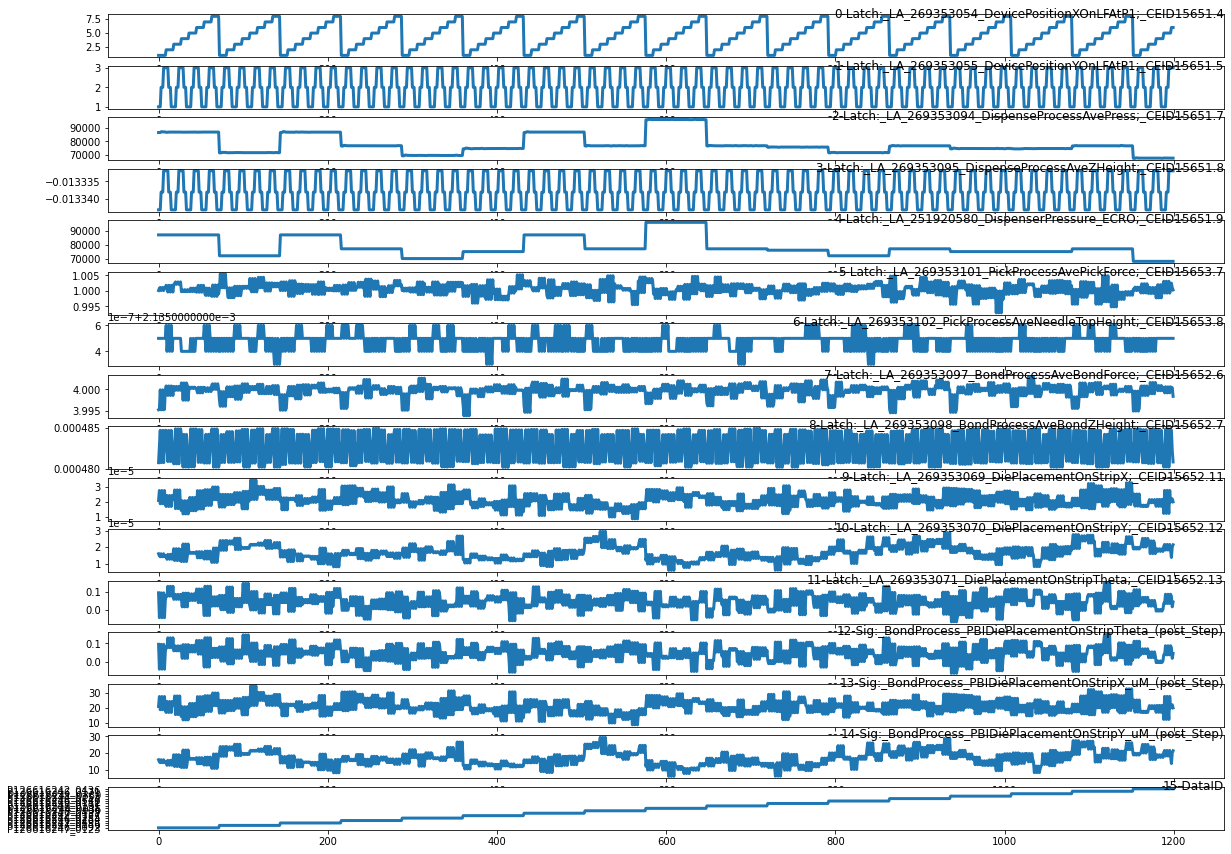

In [8]:
# Import the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,GRU, Input, ConvLSTM2D, Bidirectional,BatchNormalization
from tensorflow.keras import Input
#from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,Nadam

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import math
import json,os
from IPython.core.pylabtools import figsize
FDC_path = r"E:\FDC\dataset"
figsize(10,10) 
#FDC_Data = pd.read_csv(r'E:\FDC\dataset\data2021.csv', sep=',')

import data_vis as dv
import importlib
importlib.reload(dv)




FDC_2021Data = dv.read_data(os.path.join(FDC_path,'data_all_exclude_miss.csv'))
Y_LIST = [1,2,3,4,5,19,20,22,23,26,27,28,35,36,37,44]

X_LIST = dv.find_coi(FDC_2021Data,Y_LIST)
FDC_2021Data = FDC_2021Data.drop(FDC_2021Data.iloc[:,X_LIST],axis=1)
dv.df_col_map(FDC_2021Data)

import data_vis as dv
import importlib
importlib.reload(dv)

dv.draw_trend(FDC_2021Data,groups=range(FDC_2021Data.shape[1]),up=0,down=1200)



In [3]:
import researchpy as rp

pearson_r = rp.corr_pair(FDC_2021Data.iloc[:15],method="pearson")
spearman_r = rp.corr_pair(FDC_2021Data.iloc[:15],method="spearman")
kendall_r = rp.corr_pair(FDC_2021Data.iloc[:15],method="kendall")
pearson_r.dropna().to_csv("FDC_pearson_r.csv")
spearman_r.dropna().to_csv("FDC_spearman_r.csv")
kendall_r.dropna().to_csv("FDC_kendall_r.csv")

C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\scipy\stats\stats.py:

In [7]:
pearson_r[pearson_r["r value"] >= '0.7']

,r value,p-value,N
Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4 & Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9,nan,nan,15
Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4 & DataID,nan,nan,15
Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5 & Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8,0.9984,0.0000,15
Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5 & Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9,nan,nan,15
Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5 & DataID,nan,nan,15
Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7 & Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9,nan,nan,15
Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7 & DataID,nan,nan,15
Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8 & Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9,nan,nan,15
Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8 & DataID,nan,nan,15
Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9 & Latch:_LA_269353101_PickProcessAvePickForce;_CEID15653.7,nan,nan,15


In [10]:
data = np.array(FDC_2021Data.iloc[:,5:12])
targets = np.array(FDC_2021Data.iloc[:,0])
from sklearn.preprocessing import MinMaxScaler,RobustScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)

def gen_data(data,window=24):
    
    X_list = []
    y_list = []
    for i in range(0,data.shape[0],24):
        if data[i:i+window,:].shape[0] != 24:
            print("stop")
            print(data[i:i+window,:].shape)
            break
        #print(data[i:i+window,:].shape[0])
        X_list.append(data[i:i+window,:])
        y_list.append([1,2,3,4,5,6,7,8])
        
    
    X_arr = np.array(X_list)
    y_arr = np.array(y_list)
    #X_arr = np.concatenate([X_arr[0]])
    
    return X_arr,y_arr
    
    
X_data,y_data = gen_data(X_scaled)    
    
print(X_data.shape)
print(y_data.shape)

stop
(1, 7)
(40653, 24, 7)
(40653, 8)


In [12]:
data = np.array(FDC_2021Data.iloc[:,5:12])
targets = np.array(FDC_2021Data.iloc[:,0])
from sklearn.preprocessing import MinMaxScaler,RobustScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)

X_data = X_scaled
y_data = targets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(585403, 7)
(195135, 7)
(195135, 7)


In [13]:
from pyod.models.vae import VAE
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print



# train VAE detector (Beta-VAE)
clf_name = 'VAE'
clf = VAE(encoder_neurons=[7,128, 64, 32], 
          decoder_neurons=[32, 64, 128,7],
          latent_dim=10,
          epochs=30, 
          contamination=0.1, 
          gamma=0.8,
          batch_size=256,
          capacity=0.2,
          verbose=2)

clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 7)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 7)            56          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 7)            56          dense[0][0]                      
__________________________________________________________________________________________________
dropout (Dropout)               (None, 7)            0           dense_1[0][0]                    
______________________________________________________________________________________________

ValueError: multi_class must be in ('ovo', 'ovr')

In [77]:
pred_prob = clf.predict_proba(X_test)

In [78]:
res = np.concatenate([pred_prob[:,0].reshape(-1,1),y_test.reshape(-1,1)],axis=1)

In [80]:
df = pd.read_csv("fdc3.csv",names=["label","prob"])

In [81]:
df

,label,prob
0,0.998733,8.0
1,0.998245,5.0
2,0.998794,6.0
3,0.998541,7.0
4,0.996994,1.0
...,...,...
195130,0.997832,5.0
195131,0.999649,2.0
195132,0.998983,3.0
195133,0.996997,2.0


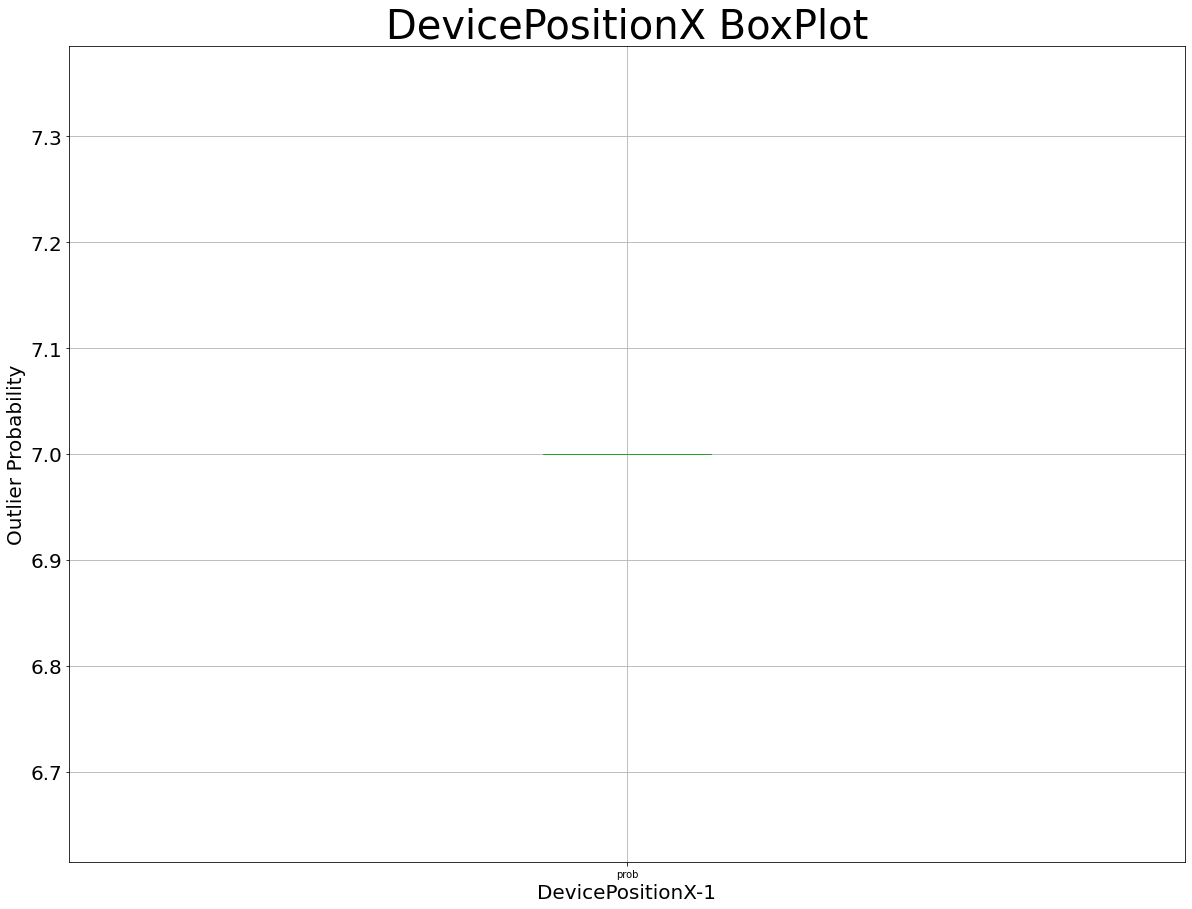

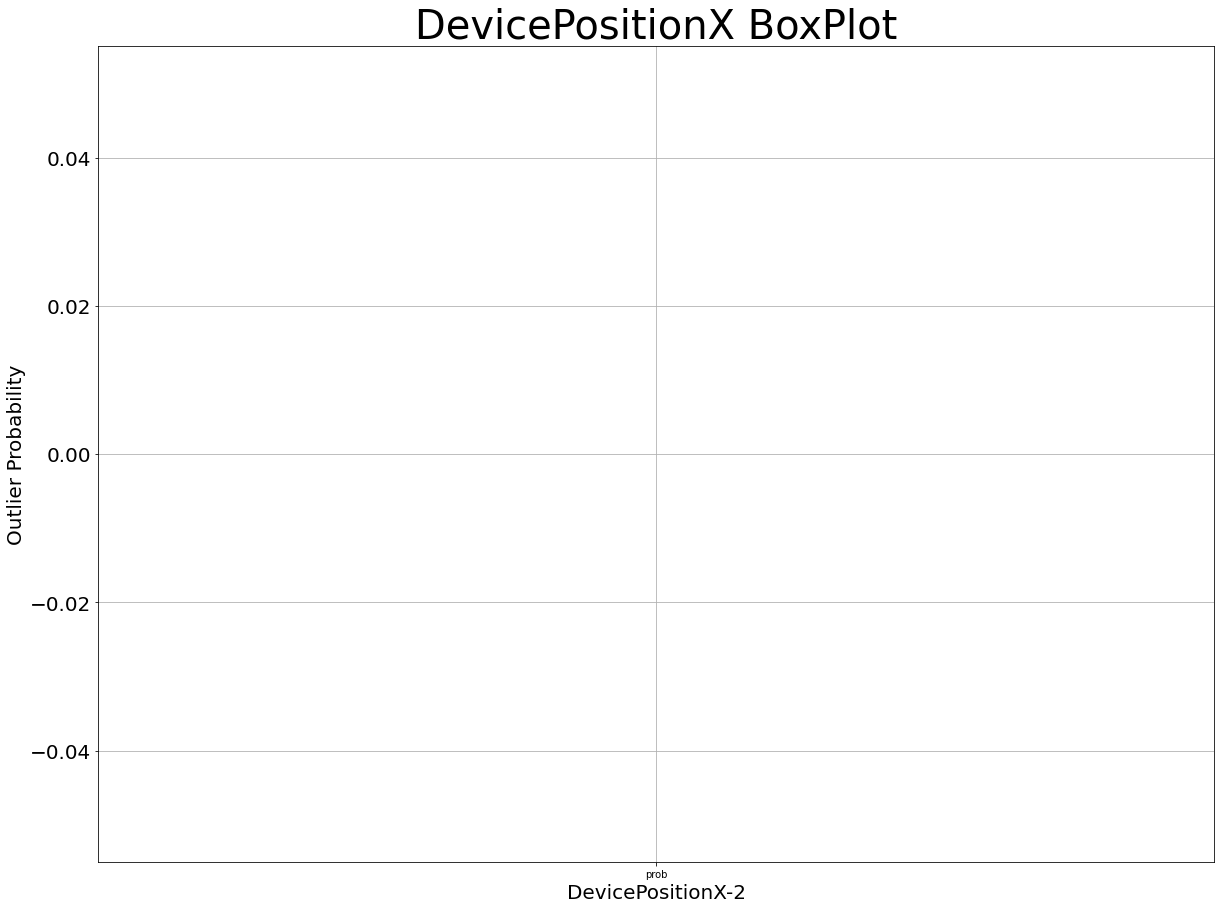

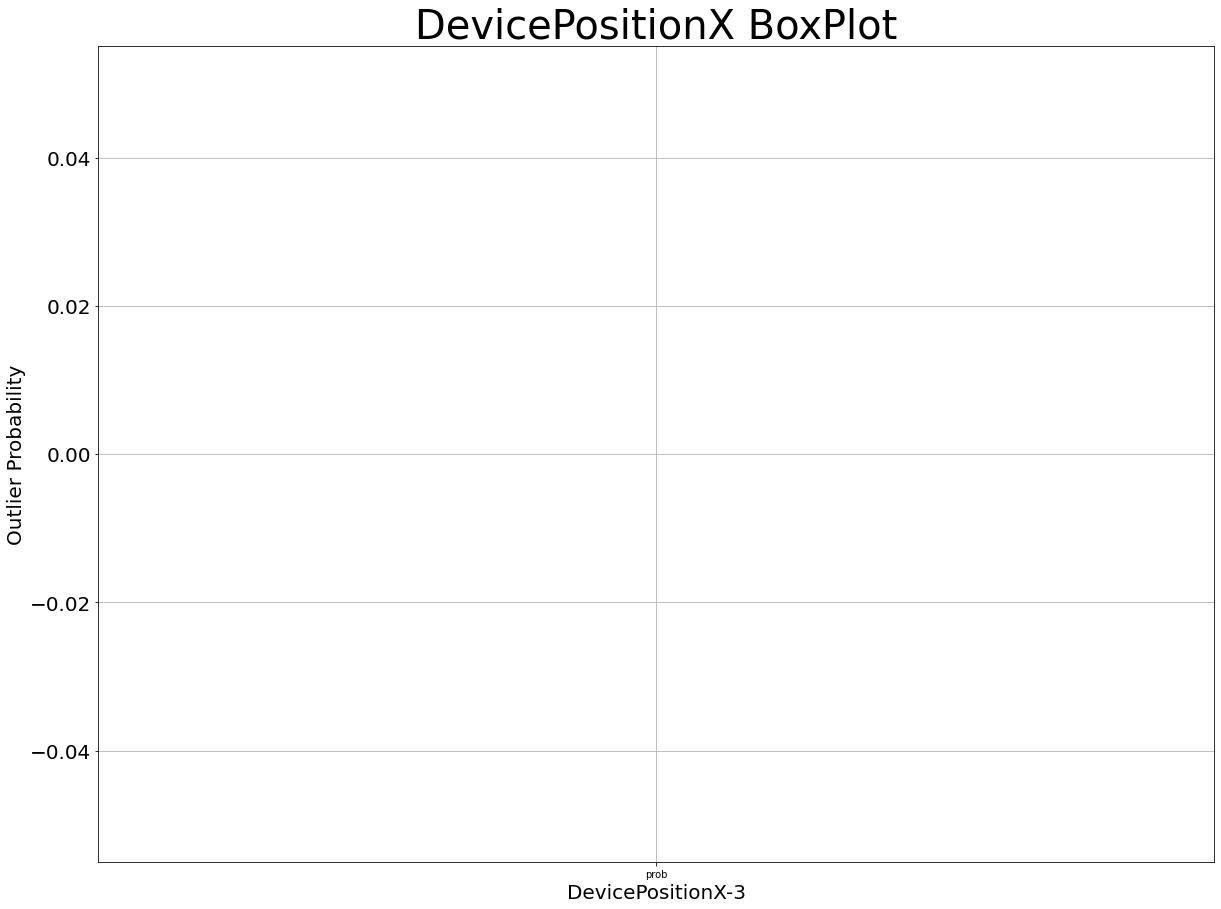

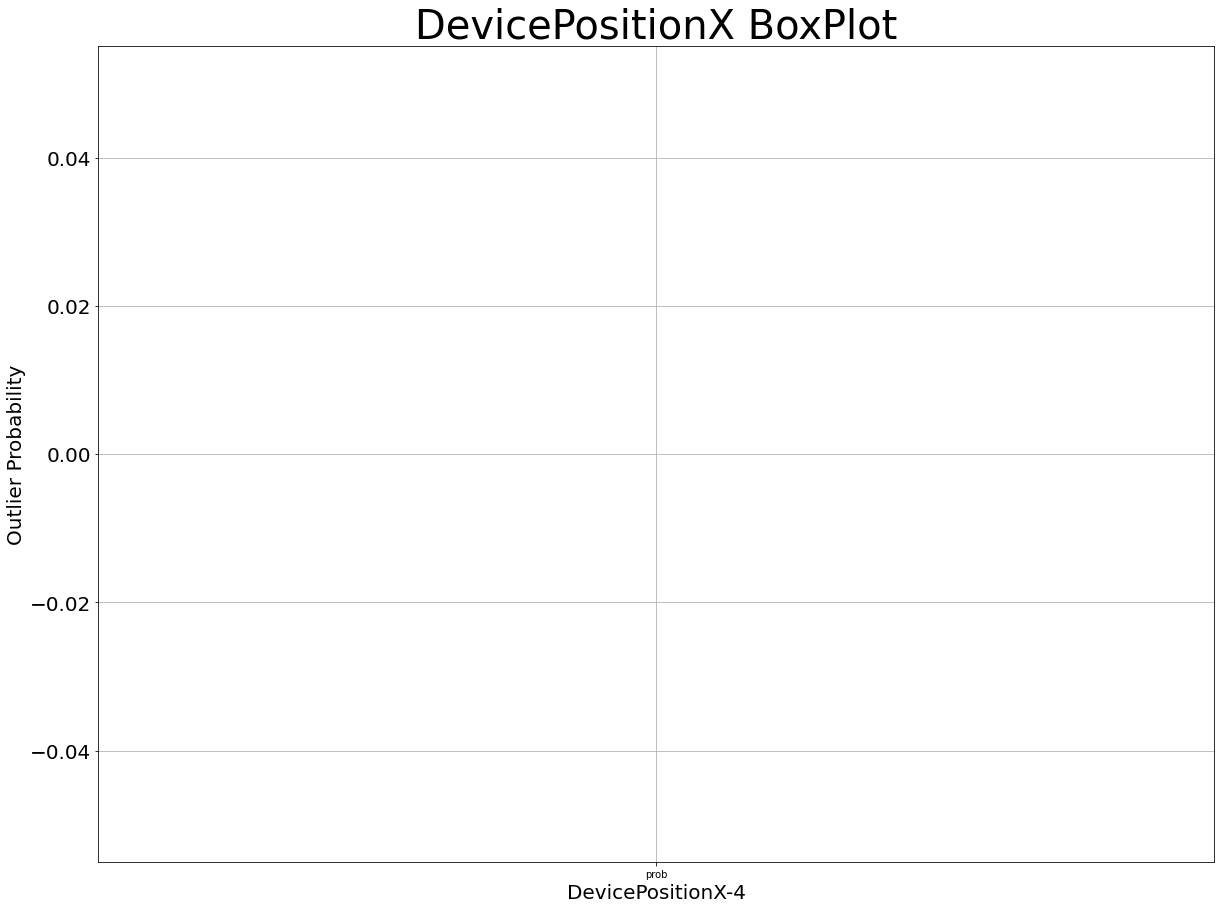

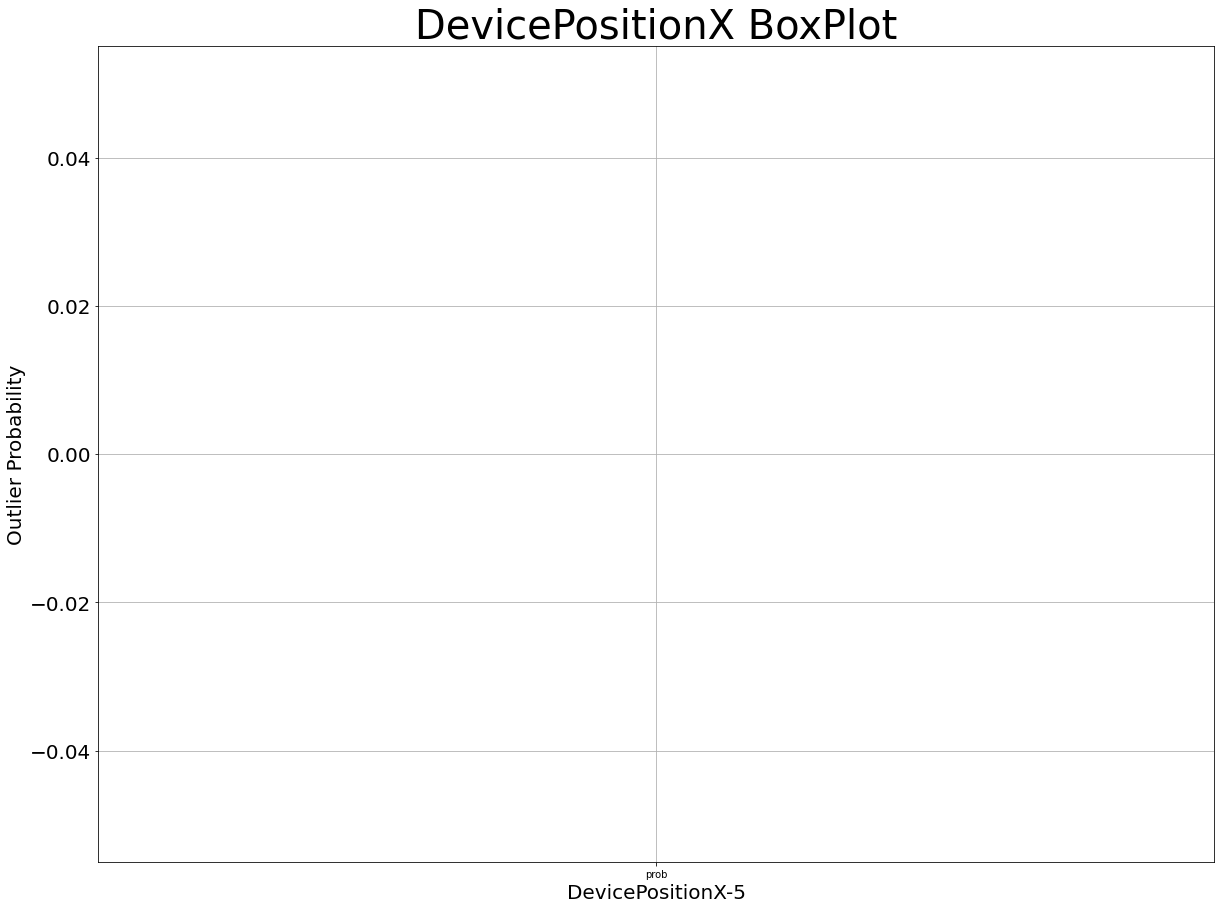

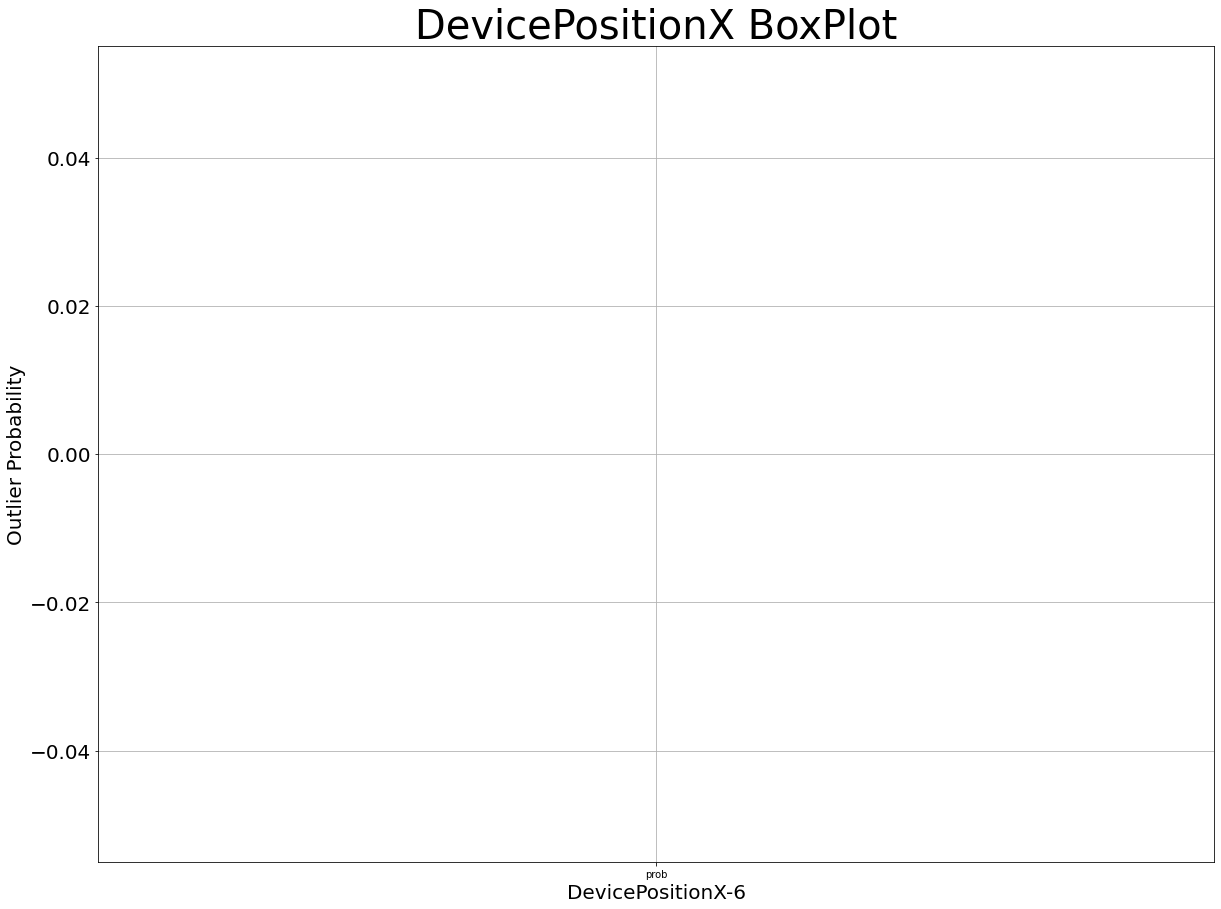

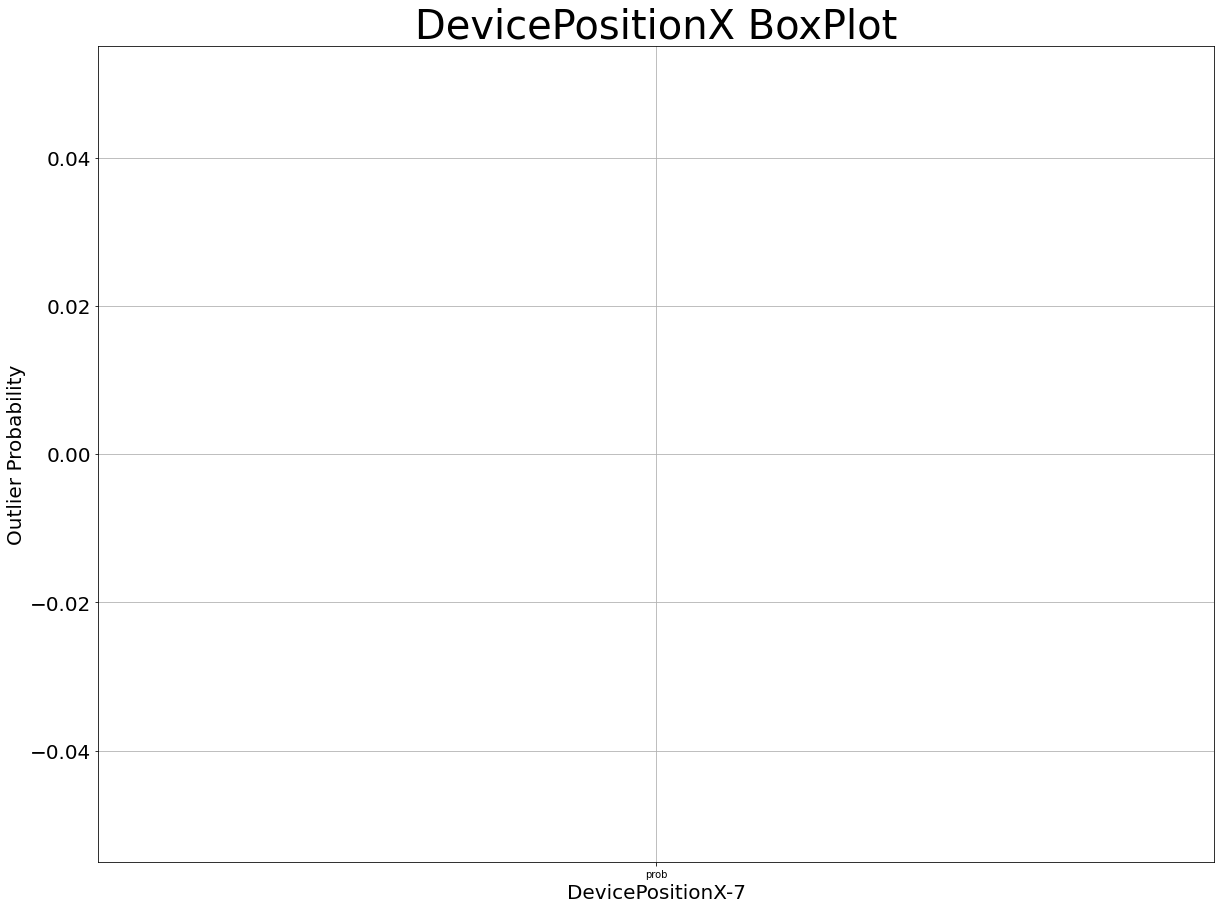

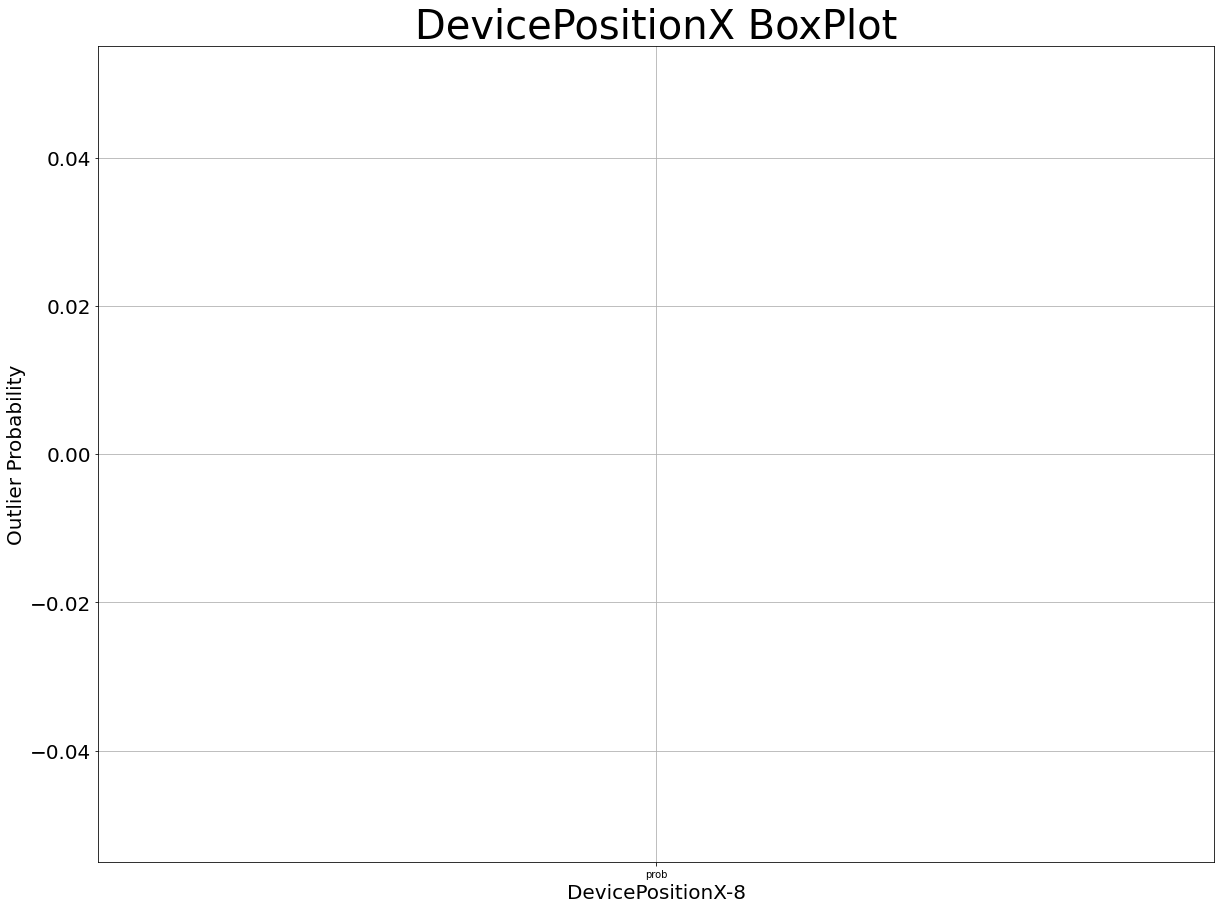

In [83]:
mean_list = []
for i in range(1,9):
   # print(df[df['label'] == i]['prob'].values)
    df[df['label'] == i].boxplot(column=['prob'])
    
    plt.title("DevicePositionX BoxPlot",fontsize=40)
    plt.xlabel("DevicePositionX-{}".format(i),fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel("Outlier Probability",fontsize=20)
    plt.savefig("Boxplot_{}.jpg".format(i))
    plt.show()
    #print(df[df['label'] == i]['prob'].values.mean())

In [79]:
np.savetxt("fdc3.csv", res, delimiter=",")